In [342]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Use `load_boston` to load the Boston Housing Dataset.
You must create a Linear Regression model fitted to this data to predict house prices.

- Check the data for nulls
- Explore the data, distributions, correlations.
- Take that into mind when choosing the features for your model.
- Watch out for colinearity.
- Split your data into train and test. [Check out how!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Measure the goodness of your fit! $R^2$, $RMSE$, etc.
- Try to make it better.
- Do your own research. Checkout both sklearn and statsmodels, get a feel of both.
- Have fun.


In [343]:
x,y = load_boston(return_X_y=True)

In [344]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [345]:
x.columns = load_boston()["feature_names"]

In [346]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [347]:
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [350]:
check = load_boston()

In [351]:
check['filename']

'/usr/local/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [355]:
df_h_prices=pd.read_csv('/usr/local/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv')

In [356]:
df_h_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   506          507 non-null    object
 1   13           507 non-null    object
 2   Unnamed: 2   507 non-null    object
 3   Unnamed: 3   507 non-null    object
 4   Unnamed: 4   507 non-null    object
 5   Unnamed: 5   507 non-null    object
 6   Unnamed: 6   507 non-null    object
 7   Unnamed: 7   507 non-null    object
 8   Unnamed: 8   507 non-null    object
 9   Unnamed: 9   507 non-null    object
 10  Unnamed: 10  507 non-null    object
 11  Unnamed: 11  507 non-null    object
 12  Unnamed: 12  507 non-null    object
 13  Unnamed: 13  507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [357]:
df_h_prices.head(3)

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [358]:
df_h_prices.columns = df_h_prices.iloc[0]
df_h_prices=df_h_prices.drop(df_h_prices.index[0])
df_h_prices.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [359]:
df_h_prices.isnull().sum()

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [360]:
df_h_prices=df_h_prices.set_index('MEDV')

In [361]:
df_h_prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
24,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14
34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33


# Multiple Linear Regression

In [277]:
lm = LinearRegression(fit_intercept=True)

In [278]:
lm.fit(x,y)

LinearRegression()

In [279]:
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [280]:
lm.intercept_

array([36.45948839])

In [281]:
y_pred = lm.predict(x)

In [282]:
r2 = r2_score(y_pred=y_pred, y_true=y)

In [283]:
r2

0.7406426641094095

In [284]:
rmse = mean_squared_error(y_pred=y_pred, y_true=y)**.5

In [285]:
rmse

4.679191295697281

In [286]:
y=y.rename(columns={0:'MEDV'})

In [287]:
corr=pd.concat([x,y],axis=1).corr()

In [288]:
corr['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [289]:
# I will use LSTAT and RM to make my prediction

# LSTAT vs MEDV

In [291]:
mod = smf.OLS(y['MEDV'],x["LSTAT"])

In [292]:
res = mod.fit()

In [293]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                    2.71e-67
Time:                        19:45:45   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
lm.fit(y,x["LSTAT"])

LinearRegression()

In [295]:
lm.coef_

array([-0.57275582])

In [296]:
lm.intercept_

25.558859226334413

In [297]:
# y= mx + b

In [298]:
X = np.arange(0,max(x["LSTAT"]),1)
Y = lm.coef_*X + lm.intercept_

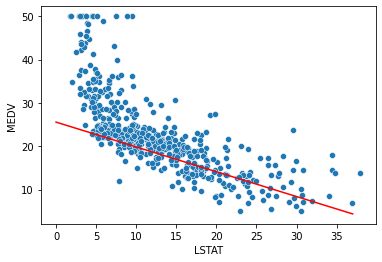

In [299]:
sns.scatterplot(x=x["LSTAT"],y=y['MEDV'])
plt.plot(X,Y,c="r");

In [304]:
y_pred = lm.predict(x["LSTAT"].to_frame())

In [305]:
r2 = r2_score(y_pred=y_pred, y_true=y)

In [306]:
r2

0.24727018891779318

In [332]:
# Why this is not the same value, actually is far away from the summary?

In [307]:
rmse = mean_squared_error(y_pred=y_pred, y_true=y)**.5

In [308]:
rmse

7.971519087167404

# RM vs MEDV

In [309]:
mod = smf.OLS(y['MEDV'],x["RM"])

In [310]:
res = mod.fit()

In [311]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                   3.74e-256
Time:                        19:51:47   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
lm.fit(y,x["RM"])

LinearRegression()

In [313]:
lm.coef_

array([0.05312235])

In [314]:
lm.intercept_

5.087638671836054

In [315]:
X = np.arange(4,max(x["RM"])+1,1)
Y = lm.coef_*X + lm.intercept_

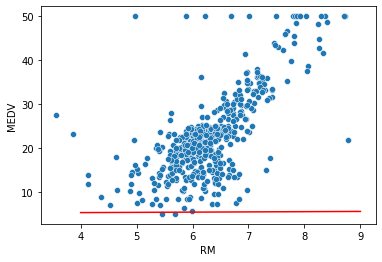

In [316]:
sns.scatterplot(x=x["RM"],y=y['MEDV'])
plt.plot(X,Y,c="r");

In [317]:
# Why is this happening? Why the line doesn't match with the distribution?

In [318]:
df = y

In [319]:
df['RM']= x["RM"]

In [320]:
x_=df['RM'].mean()
y_=df['MEDV'].mean()

In [321]:
df['x-x_']=df.RM - x_
df['y-y_']=df.MEDV - y_

In [322]:
df['(x-x_)*(y-y_)'] = df['x-x_'] * df['y-y_']
df['(x-x_)**2'] = df['x-x_']**2

In [323]:
df.head()

,MEDV,RM,x-x_,y-y_,(x-x_)*(y-y_),(x-x_)**2
0,24.0,6.575,0.290366,1.467194,0.426023,0.084312
1,21.6,6.421,0.136366,-0.932806,-0.127203,0.018596
2,34.7,7.185,0.900366,12.167194,10.954923,0.810658
3,33.4,6.998,0.713366,10.867194,7.752282,0.508890
4,36.2,7.147,0.862366,13.667194,11.786118,0.743674


In [324]:
m = df['(x-x_)*(y-y_)'].sum()/df['(x-x_)**2'].sum()

In [325]:
m

9.10210898118031

In [326]:
b = y_ - m*x_

In [327]:
b

-34.67062077643857

In [328]:
X = np.arange(4,max(x["RM"]+1),1)
Y = m*X + b

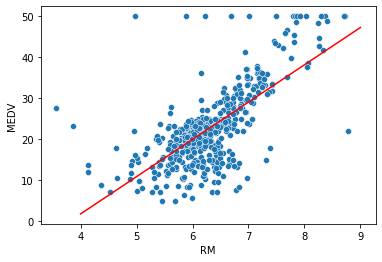

In [329]:
sns.scatterplot(x=x["RM"],y=y['MEDV'])
plt.plot(X,Y,c="r");

In [262]:
# I repeat the process in a different way but now it works.

In [333]:
y_pred = lm.predict(x["RM"].to_frame())

In [335]:
r2 = r2_score(y_pred=y_pred, y_true=y['MEDV'])

In [337]:
r2 # !!!!!!!!!!!!!!!!!!!?????????

-3.4627280410503722

In [339]:
rmse = mean_squared_error(y_pred=y_pred, y_true=y['MEDV'])**.5

In [340]:
rmse

19.409830511139106

# Split the data

In [397]:
X,y = load_boston(return_X_y=True)

In [398]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [399]:
X.columns = load_boston()["feature_names"]

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.10, test_size=0.10)

In [406]:
res = smf.OLS(y_train, X_train).fit()

In [407]:
y_pred = res.predict(X_train)
y_pred.head()

415    10.983425
314    24.626833
373     8.350669
436    12.020239
118    19.869169
dtype: float64

In [408]:
rmse = mean_squared_error(y_pred=y_pred, y_true=y_train)**.5
rmse

3.1138553669736515

### Further resources

- [The internet is your friend](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c)
- [Scikit-Learn](https://scikit-learn.org)
- [Statsmodels](https://statsmodels.org)